<a href="https://colab.research.google.com/github/JeroDeNero/CAP4630/blob/master/CAP4630HW4_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem 3.b

In [1]:
!wget --no-check-certificate\
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip\
  -O /tmp/cats_and_dogs_filtered.zip

--2020-04-20 19:26:47--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 2a00:1450:4013:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   109MB/s    in 0.6s    

2020-04-20 19:26:48 (109 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

#Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

#Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

#Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

#Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

Convolutional Base

In [3]:
from keras.applications import Xception

conv_base = Xception(
    weights = 'imagenet',
    include_top = False,
    input_shape = (150, 150, 3))

#Freezing the convolutional base
conv_base.trainable = False

Using TensorFlow backend.


83689472/83683744 [==============================] - 3s 0us/step


Concatenation of the convolutional base and densely connected layers

In [9]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(8, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten_3 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               26214912  
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 4104      
_________________________________________________________________
dropout_3 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 47,080,505
Trainable params: 26,219,025
Non-trainable params: 20,861,480
_________________________________

Train model end to end with frozen convolutional base

In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

#Data augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

#Compiling the model

model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=2e-5), 
    metrics=['acc'])

#Training the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 29s 293ms/step - loss: 0.5624 - acc: 0.6920 - val_loss: 0.1592 - val_acc: 0.9240
Epoch 2/30
100/100 [==============================] - 19s 190ms/step - loss: 0.5026 - acc: 0.7490 - val_loss: 0.3806 - val_acc: 0.9190
Epoch 3/30
100/100 [==============================] - 19s 192ms/step - loss: 0.4607 - acc: 0.7720 - val_loss: 0.0641 - val_acc: 0.9610
Epoch 4/30
100/100 [==============================] - 19s 192ms/step - loss: 0.4386 - acc: 0.7845 - val_loss: 0.2846 - val_acc: 0.9100
Epoch 5/30
100/100 [==============================] - 19s 193ms/step - loss: 0.4287 - acc: 0.7900 - val_loss: 7.7976e-04 - val_acc: 0.9580
Epoch 6/30
100/100 [==============================] - 19s 193ms/step - loss: 0.4127 - acc: 0.8010 - val_loss: 0.1683 - val_acc: 0.9490
Epoch 7/30
100/100 [==============================] - 19s 193ms/step - loss: 0.3998 - acc: 0.8055 - va

Display the curves of loss and accuracy during training

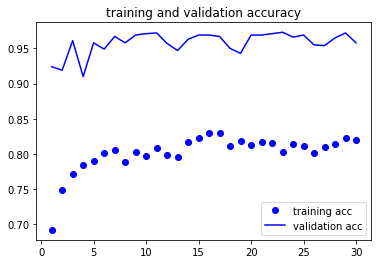

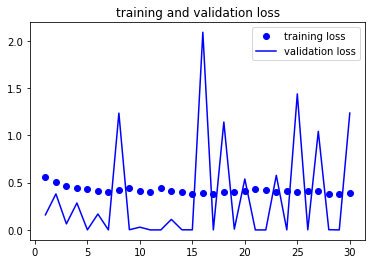

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Training and Validation accuracy
plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()

#Training and Validation loss
plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

Fine-tuning

In [10]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'dense_2':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

#Compiling the model
model.compile(
              loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(lr = 1e-10),
              metrics = ['acc'])

#Training the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50
)

Epoch 1/100
100/100 [==============================] - 23s 228ms/step - loss: 0.7692 - acc: 0.4845 - val_loss: 0.7981 - val_acc: 0.4780
Epoch 2/100
100/100 [==============================] - 19s 195ms/step - loss: 0.7579 - acc: 0.4940 - val_loss: 0.7431 - val_acc: 0.4780
Epoch 3/100
100/100 [==============================] - 19s 191ms/step - loss: 0.7469 - acc: 0.4960 - val_loss: 0.7031 - val_acc: 0.4780
Epoch 4/100
100/100 [==============================] - 19s 193ms/step - loss: 0.7597 - acc: 0.4915 - val_loss: 0.7039 - val_acc: 0.4780
Epoch 5/100
100/100 [==============================] - 19s 193ms/step - loss: 0.7453 - acc: 0.4965 - val_loss: 0.8169 - val_acc: 0.4780
Epoch 6/100
100/100 [==============================] - 19s 195ms/step - loss: 0.7614 - acc: 0.4920 - val_loss: 0.6512 - val_acc: 0.4780
Epoch 7/100
100/100 [==============================] - 19s 194ms/step - loss: 0.7480 - acc: 0.5120 - val_loss: 0.6460 - val_acc: 0.4780
Epoch 8/100
100/100 [===========================

Display learning curves during fine-tuning

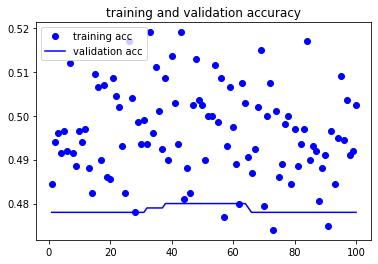

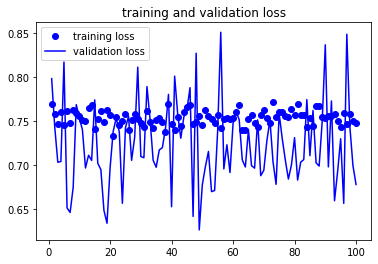

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy
plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()

# training and validation loss
plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

Print out accuracy and validation loss

In [12]:
val_loss, val_acc = model.evaluate_generator(validation_generator, steps = 50)
print("validation Loss: ", val_loss)
print("Validation Accuracy: ", val_acc)

validation Loss:  0.6777926683425903
Validation Accuracy:  0.4779999852180481
